# Support Vector Regression (SVR)

Linear SVR<br>
A tube with distance epsilon(vertically measured) on both sides of the regression line. Called the Epsilon Insensitive Tube. <br>
So if a point falls within the Epsilon Insensitive Tube, we do not consider the error of distance from regression line. Gives a certain amount of buffer to the model. <br>
For points falling outside the Epsilon Insensitive Tube, we measure the distance between the point and the tube itself. Points below the tube are called ci* and points above the tube are called ci.<br>

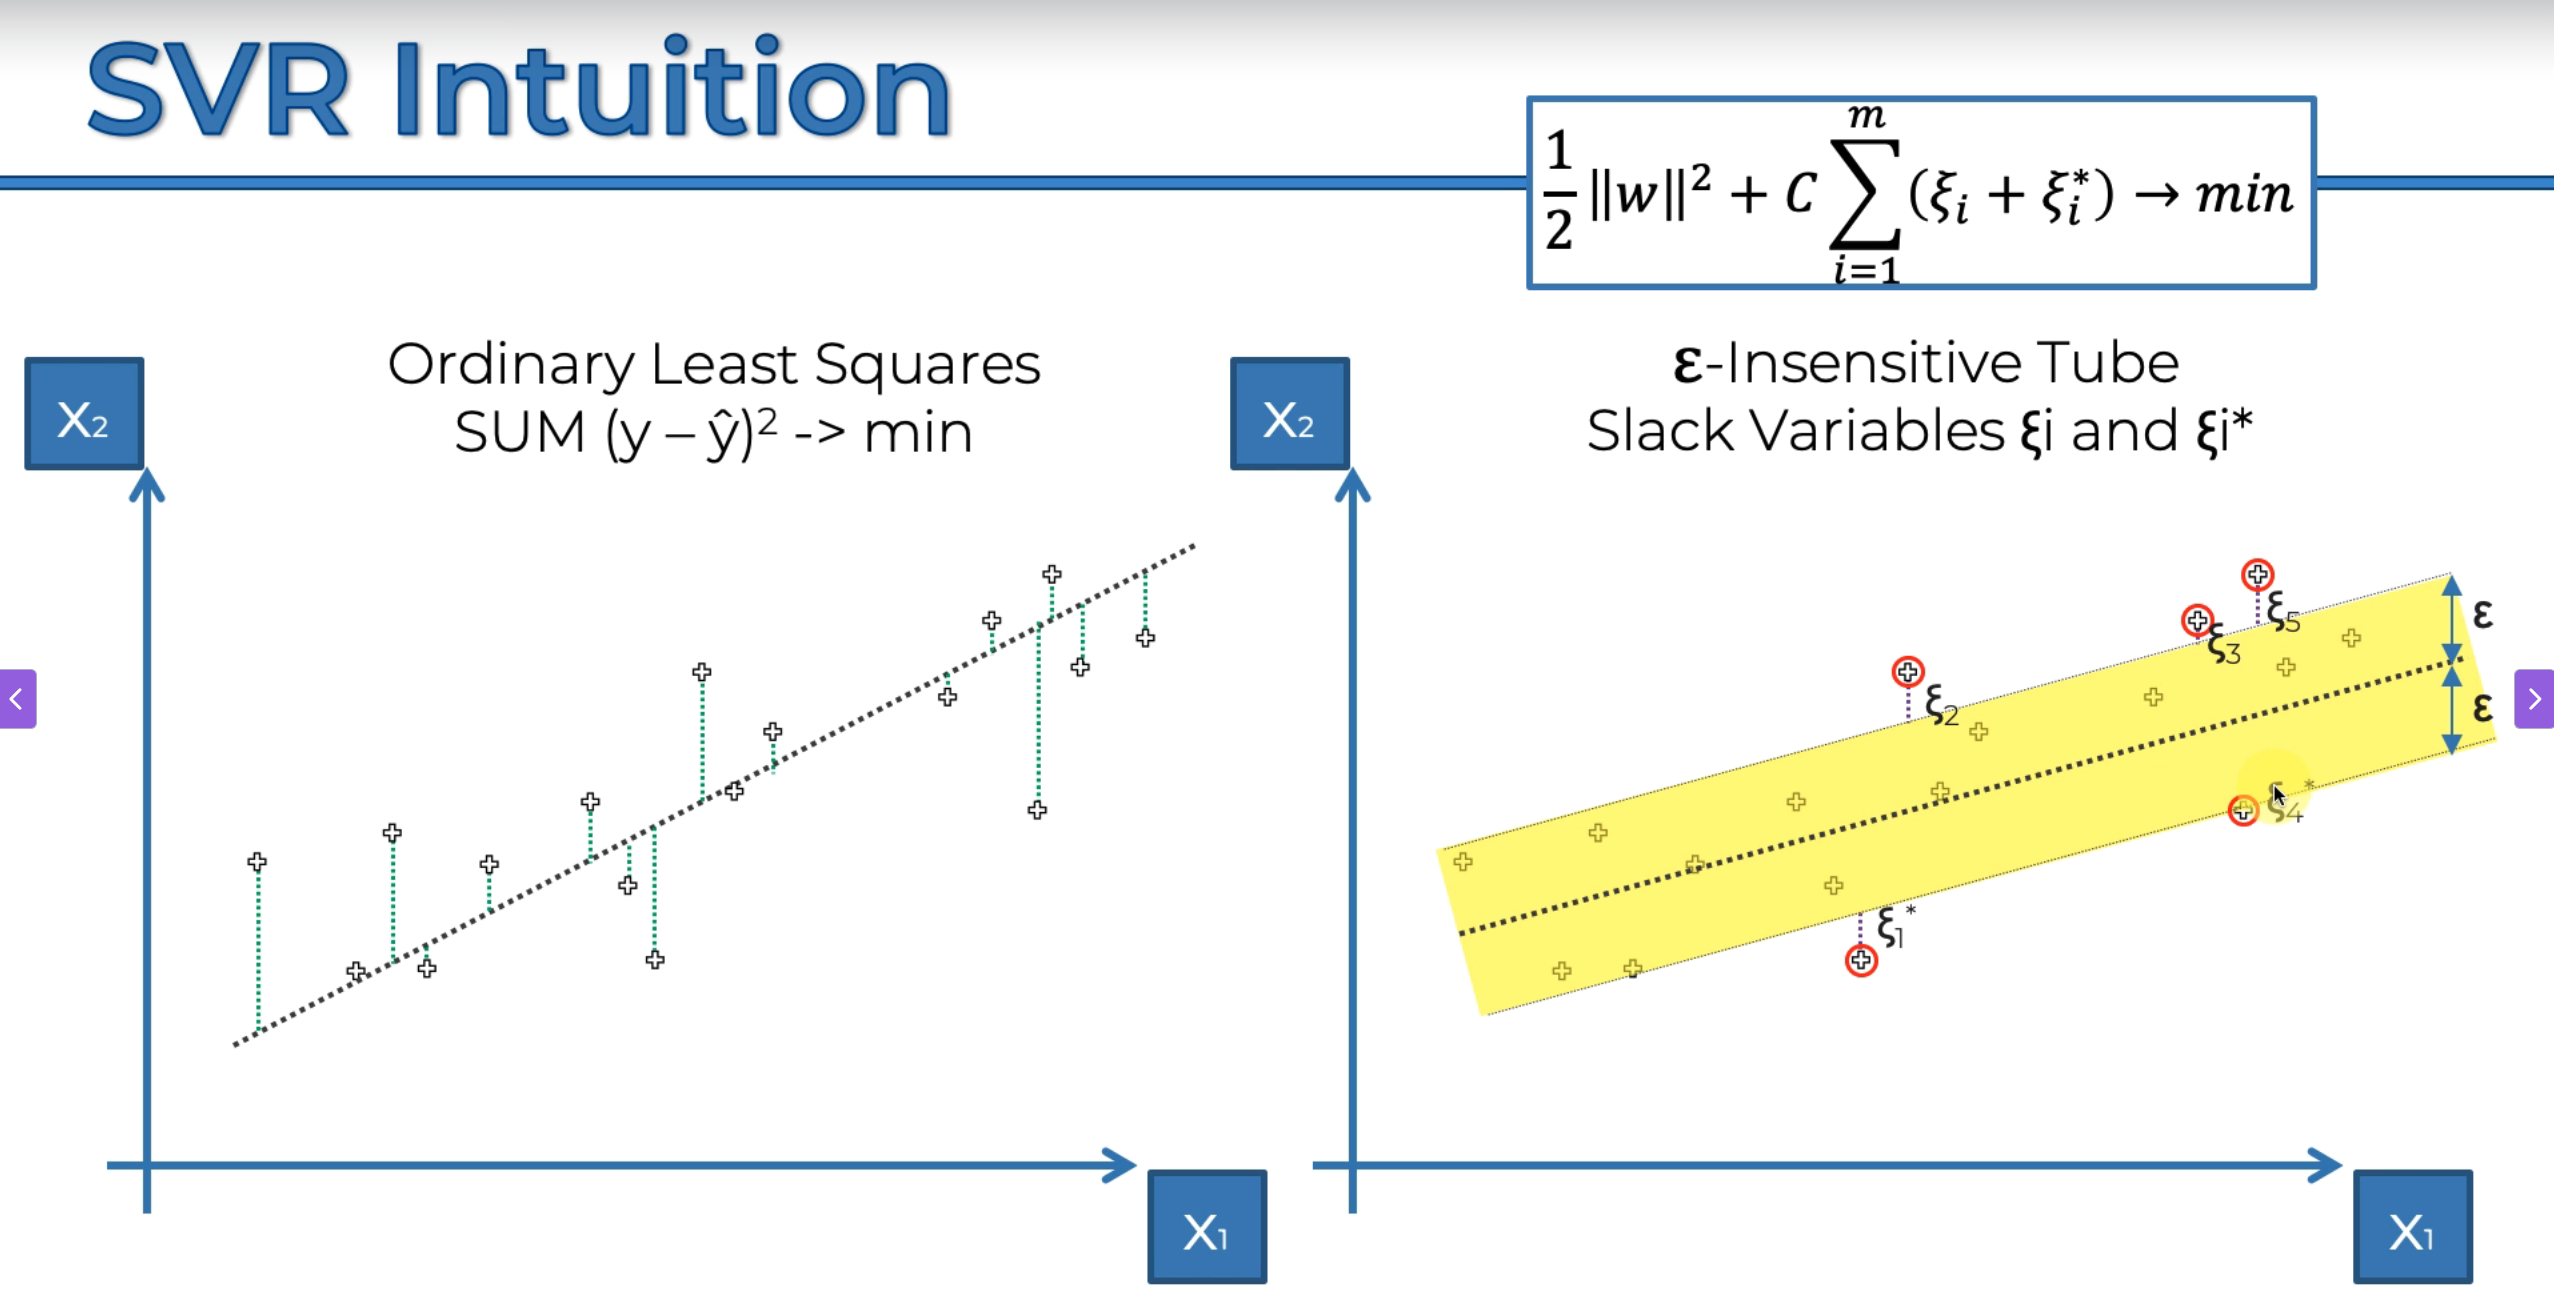

Support vectors are the points outside the tube, called so because they are supporting the structure or formation of the tube. Hence called Support Vector Regression. <br>

https://data-flair.training/blogs/svm-kernel-functions/

For non-linear regression, we use radial basis function(rbf). Non-linear SVR involves 3 dimensional graphs to represent it. <br>

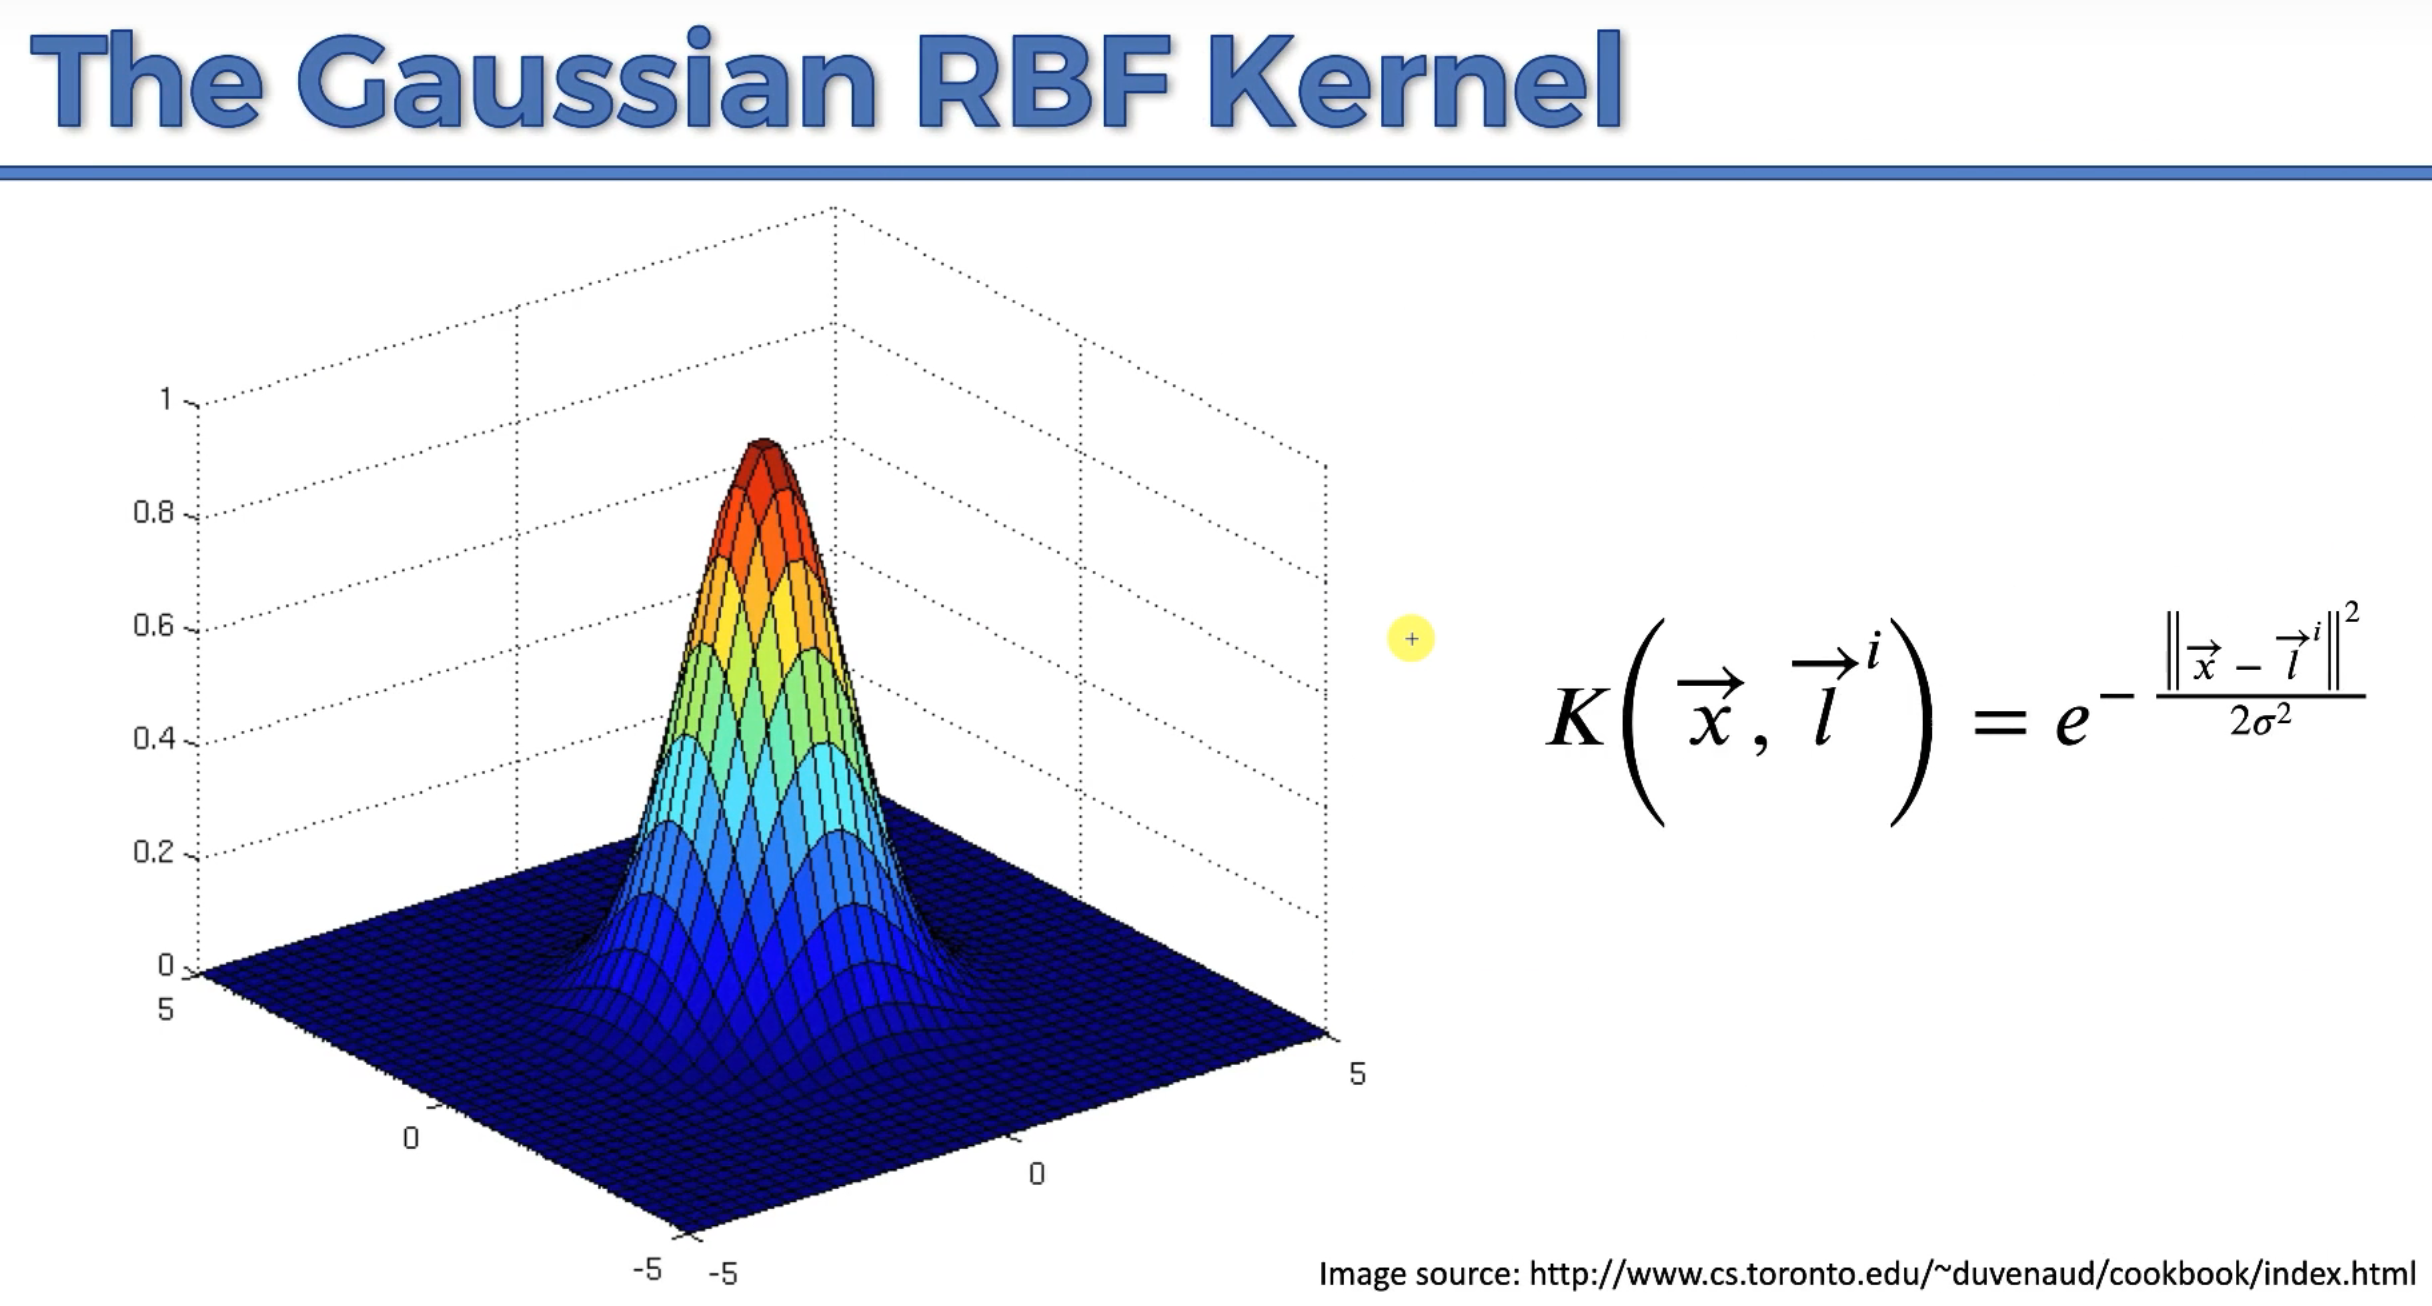

Feature Scaling has to be applied for SVR as there is no explicit equation for the dependent variable wrt features. Also, there are no coefficients multiplying each of the features, hence not compensating features with low values for the features taking high values. <br>
This model has an implicit relationship between the dependent variable y and features X.


## Importing the libraries

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [78]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [79]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [80]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


X and y are in different formats and we have to perform a transformation.<br>
The standard scale class will perform standardization / feature scaling expects a 2D array as input.

In [81]:
y = y.reshape(len(y),1)

In [82]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling
Feature scaling has to be applied for y as well to match the range of the feature scaled X. Becasue the SVR Model might reject the small values of the dependent variable.<br>
Earlier we had 0/1 for y, so we did not have to apply feature scaling at that time. 

In [83]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [84]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [85]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [96]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#can use a linear kernel or for non-linear we use rbf(radial bias function) kernel 
regressor.fit(X, y)

C:\Users\rocha\anaconda3\envs\py310_env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [108]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [112]:
#sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

In [113]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

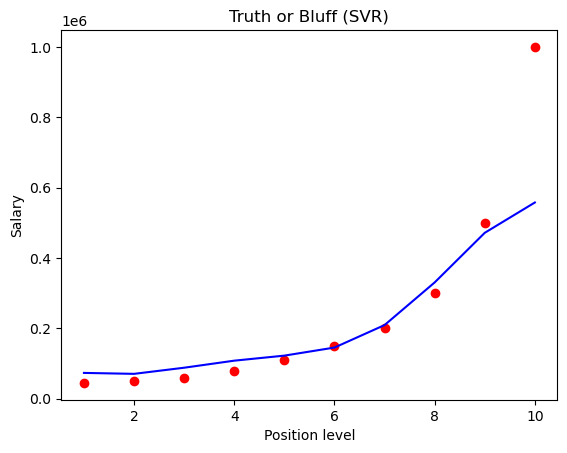

In [118]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\rocha\AppData\Local\Temp\ipykernel_10732\1882012769.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


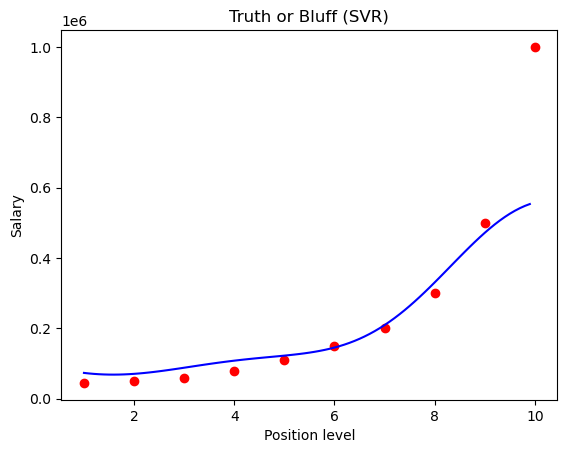

In [119]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()